# Purpose

The purpose of this notebook is to show how to use rpy2 in a Python based jupyter notebook.

**Setup**

You might have to uninstall certain packages and reinstall as different version

`conda create -n eda jupyter pandas numpy seaborn matplotlib`

`conda activate eda`

`pip install rpy2`

`conda install -c conda-forge r r-essentials r-ggplot2 r-lazyeval r-dplyr r-tidyr r-magrittr`

`jupyter notebook`

Links: 

- https://rpy2.github.io/doc/latest/html/notebooks.html
- https://rpy2.github.io/doc/latest/html/interactive.html?highlight=magic#rpy2.ipython.rmagic.RMagics
- https://github.com/rstudio/cheatsheets/blob/master/data-visualization-2.1.pdf


In [2]:
# Load python packages
import seaborn as sns
import numpy as np
import pandas as pd

In [3]:
# Load rpy2 extension (and R packages)
%load_ext rpy2.ipython

In [5]:
%%R
library(ggplot2)
library(dplyr)
library(tidyr)
library(magrittr)

# Visualize data

### Scatterplot

In [4]:
df_plt = sns.load_dataset("iris")

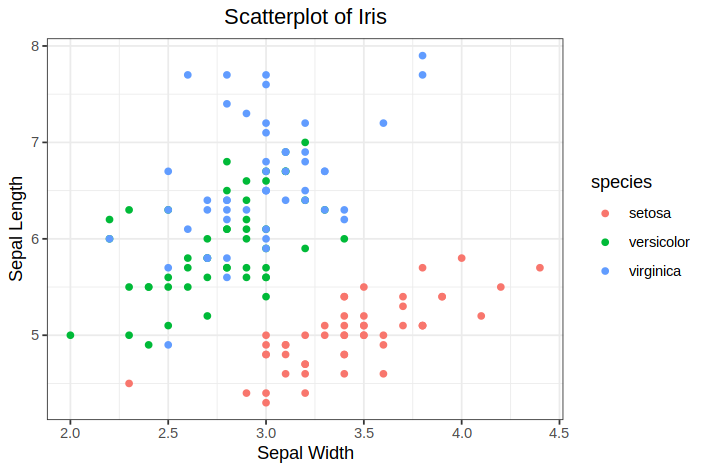

In [5]:
%%R -w 15 -h 10 --units cm -r 120 -i df_plt
ggplot(df_plt, aes(x = sepal_width, y = sepal_length, color = species, 
                   color = species)) +
    geom_point() +
    labs(title = "Scatterplot of Iris", x = "Sepal Width", y = "Sepal Length") +
    theme_bw() + theme(plot.title = element_text(hjust = 0.5))


### Density pot

In [6]:
df_plt = sns.load_dataset("iris")

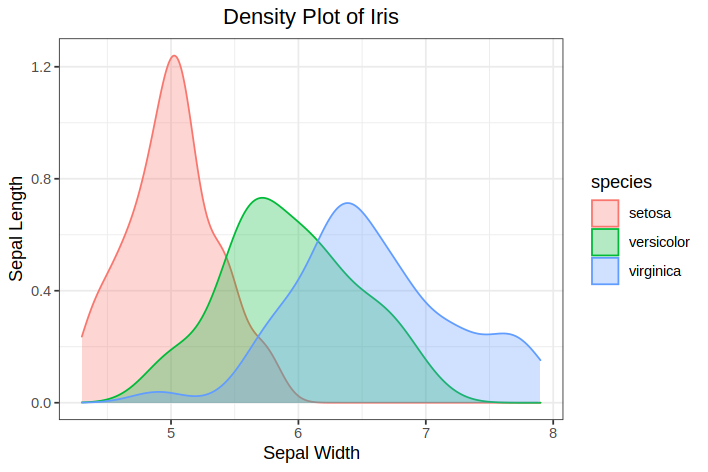

In [7]:
%%R -w 15 -h 10 --units cm -r 120 -i df_plt
ggplot(df_plt, aes(x = sepal_length, color = species, fill = species)) + 
    geom_density(alpha = 0.3) +
    labs(title = "Density Plot of Iris", x = "Sepal Width", y = "Sepal Length") +
    theme_bw() + theme(plot.title = element_text(hjust = 0.5))


### Boxplot

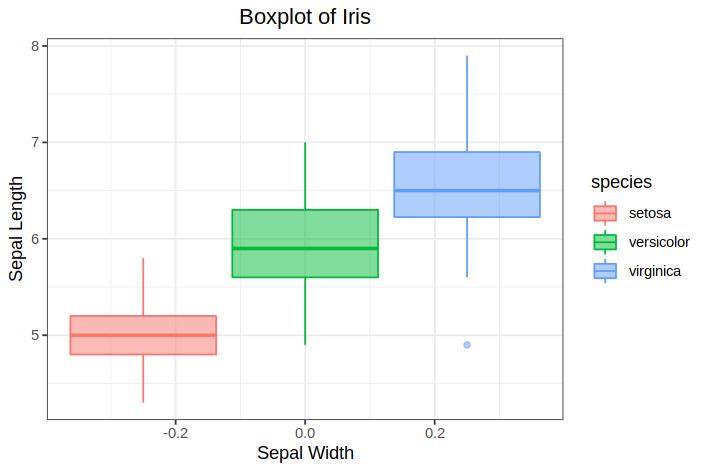

In [8]:
%%R -w 15 -h 10 --units cm -r 120 -i df_plt
ggplot(df_plt, aes(y = sepal_length, color = species, fill = species)) + 
    geom_boxplot(alpha = 0.5) +
    labs(title = "Boxplot of Iris", x = "Sepal Width", y = "Sepal Length") +
    theme_bw() + theme(plot.title = element_text(hjust = 0.5))

### Violin plot

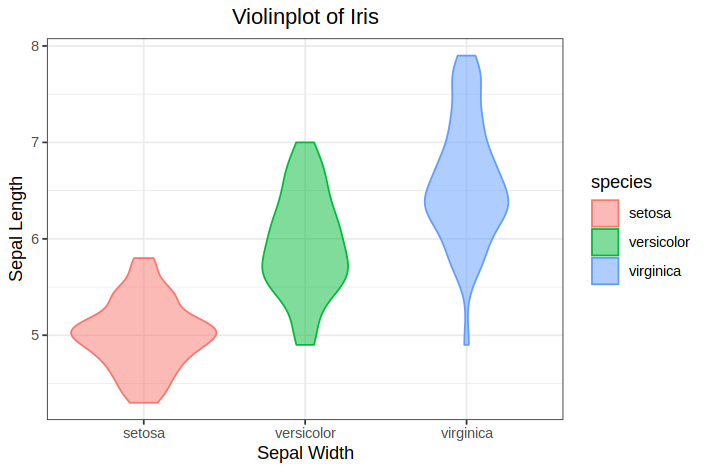

In [9]:
%%R -w 15 -h 10 --units cm -r 120 -i df_plt
ggplot(df_plt, aes(x = species, y = sepal_length, color = species, fill = species)) + 
    geom_violin(alpha = 0.5) +
    labs(title = "Violinplot of Iris", x = "Sepal Width", y = "Sepal Length") +
    theme_bw() + theme(plot.title = element_text(hjust = 0.5))

### Histogram

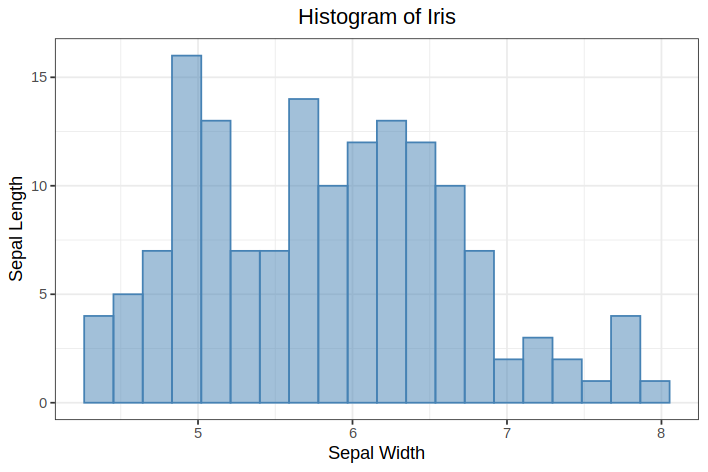

In [10]:
%%R -w 15 -h 10 --units cm -r 120 -i df_plt
ggplot(df_plt, aes(x = sepal_length)) + 
    geom_histogram(alpha = 0.5, bins = 20, color = "steelblue", fill = "steelblue") +
    labs(title = "Histogram of Iris", x = "Sepal Width", y = "Sepal Length") +
    theme_bw() + theme(plot.title = element_text(hjust = 0.5))

### Line plot

In [11]:
df_plt = sns.load_dataset("flights")

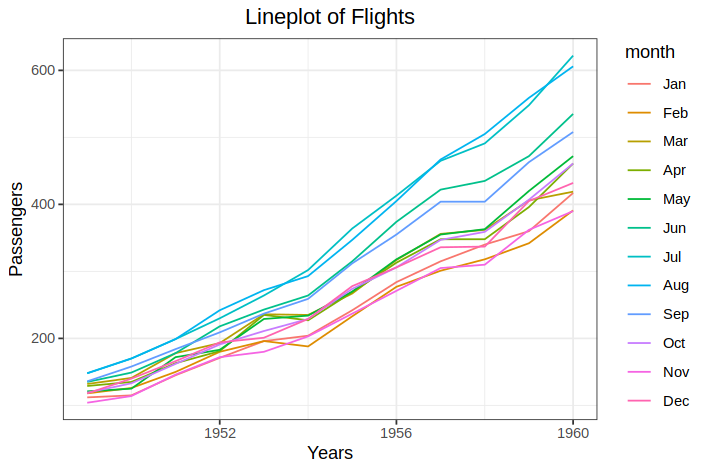

In [12]:
%%R -w 15 -h 10 --units cm -r 120 -i df_plt
ggplot(df_plt, aes(x = year, y = passengers, color = month)) + 
    geom_line() +
    labs(title = "Lineplot of Flights", x = "Years", y = "Passengers") +
    theme_bw() + theme(plot.title = element_text(hjust = 0.5))

### Countplot

In [25]:
df_plt = sns.load_dataset("diamonds")

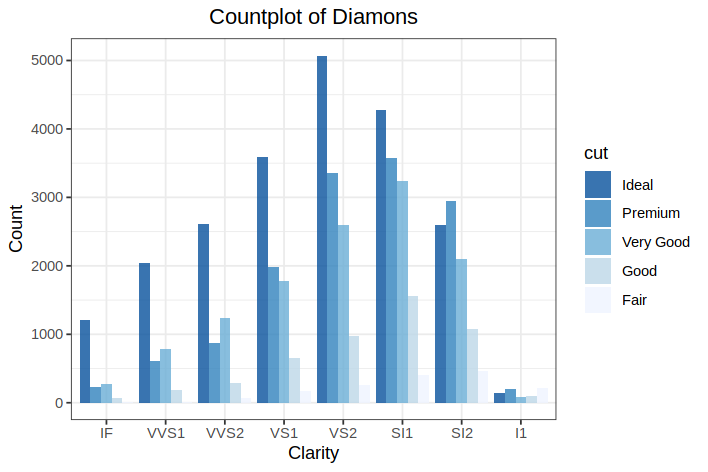

In [27]:
%%R -w 15 -h 10 --units cm -r 120 -i df_plt
ggplot(df_plt, aes(clarity, fill = cut)) +     
    geom_bar(position = 'dodge', alpha = 0.8) +
    scale_fill_brewer(palette = "Blues", direction = -1) +
    labs(title = "Countplot of Diamons", x = "Clarity", y = "Count") +
    theme_bw() + theme(plot.title = element_text(hjust = 0.5))

### Barchart

In [21]:
# Raw Data
a1 = np.array([10, 25, 20, 30, 55, 60])
a2 = np.array(["A", "B", "C", "D", "E", "F"])

# Sorted Data
idx = a1.argsort()
a1 = a1[idx[::-1]]
a2 = a2[idx[::-1]]

df_plt = pd.DataFrame({'a1': a1, 'a2': a2})

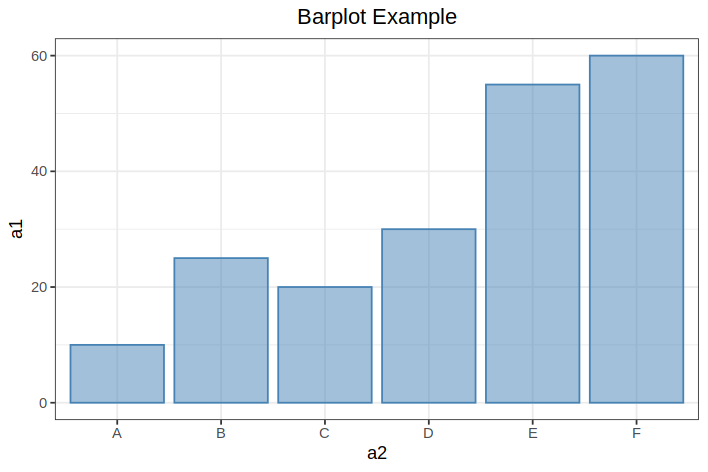

In [23]:
%%R -w 15 -h 10 --units cm -r 120 -i df_plt
ggplot(df_plt, aes(x = a2, y = a1)) + 
    geom_col(fill = "steelblue", color = "steelblue", alpha = 0.5) +
    labs(title = "Barplot Example", x = "a2", y = "a1") +
    theme_bw() + theme(plot.title = element_text(hjust = 0.5))

### Heatmap

In [35]:
df_plt = sns.load_dataset("flights")

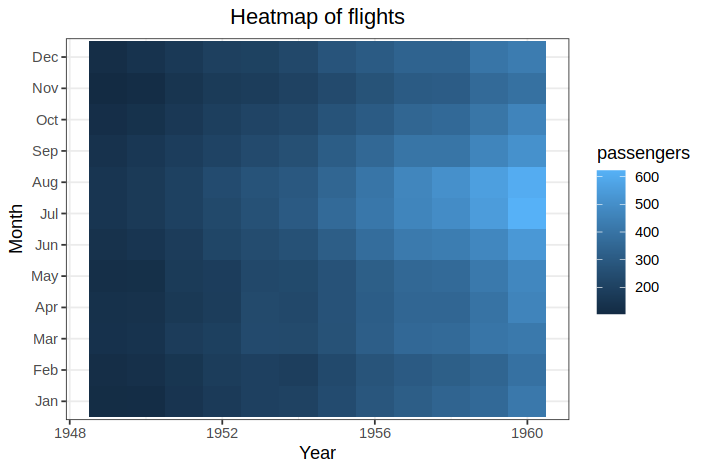

In [39]:
%%R -w 15 -h 10 --units cm -r 120 -i df_plt
ggplot(df_plt, aes(year, month, fill = passengers)) + 
    geom_tile() +
    labs(title = "Heatmap of flights", x = "Year", y = "Month") +
    theme_bw() + theme(plot.title = element_text(hjust = 0.5))

### Facet plot

In [17]:
df_plt = sns.load_dataset("iris")

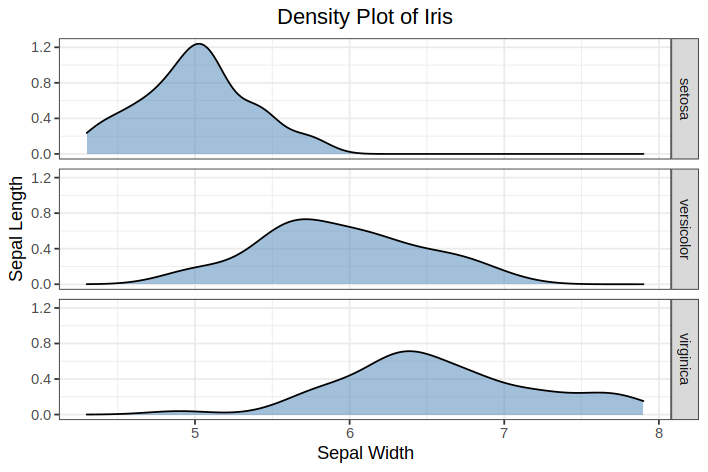

In [18]:
%%R -w 15 -h 10 --units cm -r 120 -i df_plt
ggplot(df_plt, aes(x = sepal_length)) + 
    geom_density(fill = "steelblue", alpha = 0.5) + 
    facet_grid(vars(species)) +
    labs(title = "Density Plot of Iris", x = "Sepal Width", y = "Sepal Length") +
    theme_bw() + theme(plot.title = element_text(hjust = 0.5))

### Exporting plots to file

Note: This works even though there is an error regarding printing width.

In [13]:
df_plt = sns.load_dataset("iris")

In [14]:
%%R -w 10 -h 10 --units cm -r 120 -i df_plt
ggplot(df_plt, aes(x = sepal_length)) + 
    geom_density(fill = "steelblue", alpha = 0.5) + 
    facet_grid(vars(species)) +
    labs(title = "Density Plot of Iris", x = "Sepal Width", y = "Sepal Length") +
    theme_bw() + theme(plot.title = element_text(hjust = 0.5))
    
ggsave("filename.jpg", width = 10, height = 10, dpi =  300)

R[write to console]: Error in print.default(item$value) : invalid printing width




Error in print.default(item$value) : invalid printing width
